# Data Collection, Exploration, and Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
CarSales = pd.read_csv('../Car Sales.xlsx - car_data (1).csv', index_col=0)
CarSales.head()

,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
Car_id,,,,,,,,,,,,,,,
C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


the dataset talking about historical car sales with relevant features such as dates, sales amount and the target column of our analysis is the  " price($) " of the car .              
our goal is to predict the price of a car based on other features.


# Data Exploration Analysis (EDA):

### First: check at data types and missing valuesfor each column 

In [3]:
print(CarSales.info())  

<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, C_CND_000001 to C_CND_023906
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           23906 non-null  object
 1   Customer Name  23905 non-null  object
 2   Gender         23906 non-null  object
 3   Annual Income  23906 non-null  int64 
 4   Dealer_Name    23906 non-null  object
 5   Company        23906 non-null  object
 6   Model          23906 non-null  object
 7   Engine         23906 non-null  object
 8   Transmission   23906 non-null  object
 9   Color          23906 non-null  object
 10  Price ($)      23906 non-null  int64 
 11  Dealer_No      23906 non-null  object
 12  Body Style     23906 non-null  object
 13  Phone          23906 non-null  int64 
 14  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(12)
memory usage: 2.9+ MB
None


we have to be cast the column Data to==> data type 

In [6]:
CarSales.shape # the shape of dataframe has a 23906 rows and 15 columns

(23906, 15)

### Second: Count missing values in each column


In [8]:
print(CarSales.isnull().sum()) 

Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


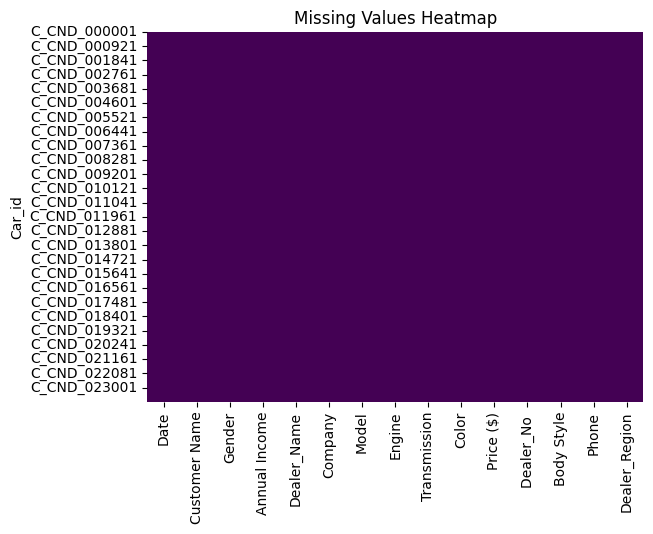

In [9]:
sns.heatmap(CarSales.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

we found a one column has a null values 

In [10]:
print(CarSales.describe())  # Summary of numerical columns

       Annual Income     Price ($)         Phone
count   2.390600e+04  23906.000000  2.390600e+04
mean    8.308403e+05  28090.247846  7.497741e+06
std     7.200064e+05  14788.687608  8.674920e+05
min     1.008000e+04   1200.000000  6.000101e+06
25%     3.860000e+05  18001.000000  6.746495e+06
50%     7.350000e+05  23000.000000  7.496198e+06
75%     1.175750e+06  34000.000000  8.248146e+06
max     1.120000e+07  85800.000000  8.999579e+06


### Three: Detect Outliers

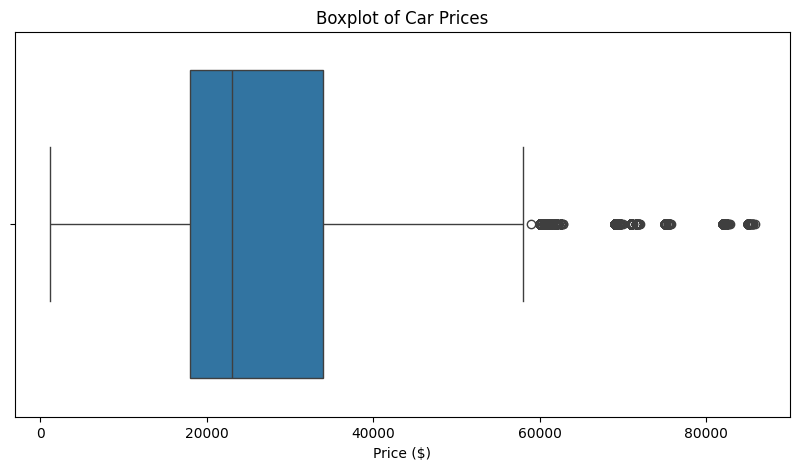

'Insights:\n- The majority of car prices range between $10,000 and $40,000.\n- There are several high-priced outliers, indicating luxury or premium cars.\n- The data is right-skewed, meaning some cars have much higher prices than the majority.\n'

In [11]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=CarSales["Price ($)"])
plt.title("Boxplot of Car Prices")
plt.show()
"""Insights:
- The majority of car prices range between $10,000 and $40,000.
- There are several high-priced outliers, indicating luxury or premium cars.
- The data is right-skewed, meaning some cars have much higher prices than the majority.
"""

### Four:Feature Engineering - Extracting time-based features

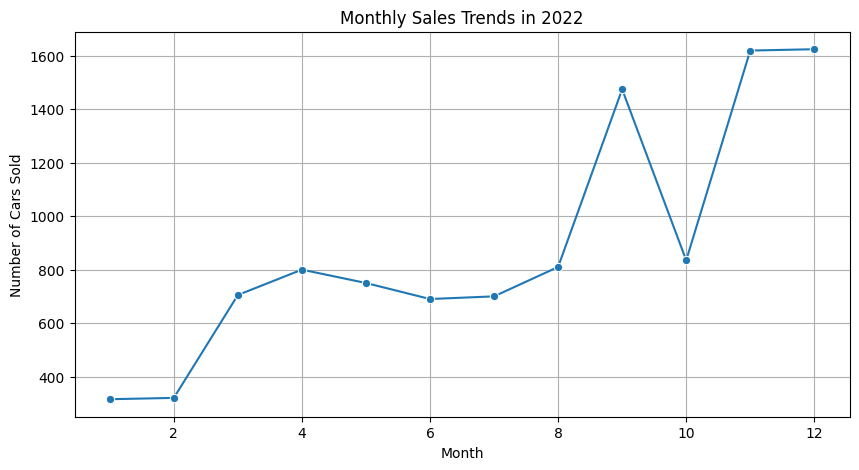

In [12]:
# Converting 'Date' column to datetime and extracting year, month, day of the week, and  make a season column based on data column
CarSales['Date'] = pd.to_datetime(CarSales['Date'])
CarSales['Year'] = CarSales['Date'].dt.year
CarSales['Month'] = CarSales['Date'].dt.month
CarSales['DayOfWeek'] = CarSales['Date'].dt.dayofweek
CarSales['Season'] = CarSales['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] 
                                 else 'Spring' if x in [3, 4, 5] 
                                 else 'Summer' if x in [6, 7, 8] 
                                 else 'Fall')
# Filtering data for year 2022
df_2022 = CarSales[CarSales['Year'] == 2022]

# Monthly sales trend for 2022
monthly_sales = df_2022.groupby("Month")["Price ($)"].count()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Monthly Sales Trends in 2022")
plt.grid()
plt.show()

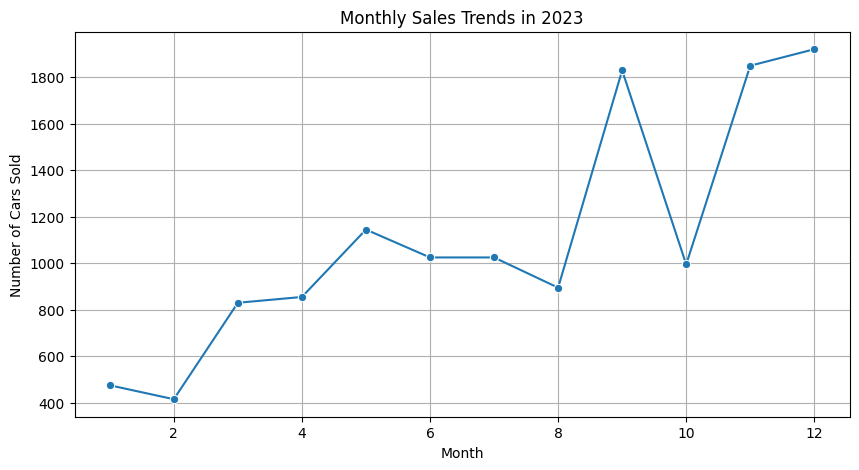

In [20]:
# Filtering data for year 2022
df_2023 = CarSales[CarSales['Year'] == 2023]

# Monthly sales trend for 2022
monthly_sales = df_2023.groupby("Month")["Price ($)"].count()
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Number of Cars Sold")
plt.title("Monthly Sales Trends in 2023")
plt.grid()
plt.show()

### Five: Correlation Analysis

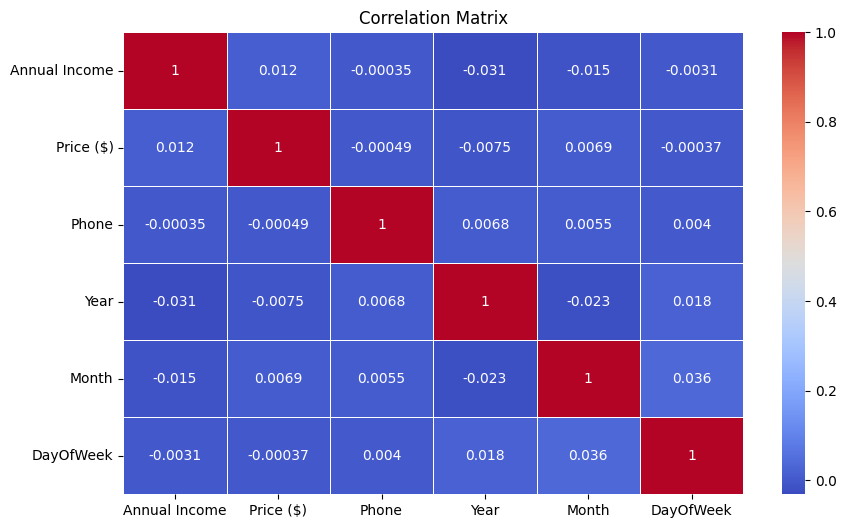

In [27]:
numeric = CarSales.select_dtypes(include=['number']) # filter out only numeric columns
correlation_matrix = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

-Converting 'Date' column to datetime and extracting year, month, day of the week.                                    
-Grouping months into seasons helps analyze seasonal patterns in sales, which is critical for forecasting.                                                  
-Focusing on a specific year (2022) and year (2023) narrows down the analysis and ensures you're examining recent trends or data relevant to your objective.    
-summarizes the total number of cars sold per month, making it easier to identify trends in monthly sales.                                                   
-extracts numeric columns, calculates correlations, and visualizes them in a heatmap to identify relationships between variables. It helps in feature selection, reducing redundancy, and understanding the dataset's structure for better predictive modeling.

# Data cleaning

Handling missing values 

In [32]:
CarSales['Customer Name'].fillna('Unknown', inplace=True)


check for duplicates 

In [35]:
duplicates = CarSales.duplicated().sum()
print(f'Total duplicates before removal: {duplicates}')

Total duplicates before removal: 0


In [37]:
# Remove duplicates
CarSales.drop_duplicates(inplace=True)

In [39]:
duplicates_after = CarSales.duplicated().sum()
print(f'Total duplicates after removal: {duplicates_after}')

Total duplicates after removal: 0


Save the cleaned DataFrame to a new CSV file

In [42]:
CarSales.to_csv('Car_sales_CleanData.csv', index=False)

print("Cleaned data saved to 'Car_sales_CleanData.csv'.")

Cleaned data saved to 'Car_sales_CleanData.csv'.


-checks for missing values in each column and prints the counts.                                               
-The code identifies and counts duplicate rows before removal,Duplicates are removed, and the count is checked again to confirm removal.                     
-calculates total sales by year and displays the result.                                                                  
-the cleaned DataFrame is saved to a new CSV file named Car_sales_CleanData.

# Engineer time-based features 

In [45]:
# Calculate total sales by year
sales_by_year = CarSales.groupby('Year')['Price ($)'].sum().reset_index()

# Create a table for highest sales by year, month, day of the week, and season
highest_sales_per_year = []

for year in sales_by_year['Year']:
    year_CarSales = CarSales[CarSales['Year'] == year]
    
    # Calculate total sales by month for the current year
    sales_by_month = year_CarSales.groupby('Month')['Price ($)'].sum().reset_index()
    highest_sales_month = sales_by_month.loc[sales_by_month['Price ($)'].idxmax()]
    
    # Calculate total sales by day of the week for the current year
    sales_by_week = year_CarSales.groupby('DayOfWeek')['Price ($)'].sum().reset_index()
    highest_sales_day = sales_by_week.loc[sales_by_week['Price ($)'].idxmax()]
    
    # Calculate total sales by season for the current year
    sales_by_season = year_CarSales.groupby('Season')['Price ($)'].sum().reset_index()
    highest_sales_season = sales_by_season.loc[sales_by_season['Price ($)'].idxmax()]
    
    # Add the highest sales for each category for this year to the list
    highest_sales_per_year.append({
        'Year': year,
        'Highest Sales Month': highest_sales_month['Month'],
        'Month Sales ($)': highest_sales_month['Price ($)'],
        'Highest Sales Day': highest_sales_day['DayOfWeek'],
        'Day Sales ($)': highest_sales_day['Price ($)'],
        'Highest Sales Season': highest_sales_season['Season'],
        'Season Sales ($)': highest_sales_season['Price ($)']
    })

# Convert the list to a CarSalesFrame
highest_sales_df = pd.DataFrame(highest_sales_per_year)

# Display the table
print(highest_sales_df)

   Year  Highest Sales Month  Month Sales ($)  Highest Sales Day  \
0  2022                   11         45389290                  6   
1  2023                   12         54281601                  4   

   Day Sales ($) Highest Sales Season  Season Sales ($)  
0       56784272                 Fall         111599015  
1       68756406                 Fall         131051106  


# Finally: Check data after cleaning step

In [43]:
Car_sales_CleanData = pd.read_csv('Car_sales_CleanData.csv', index_col=0)
print(Car_sales_CleanData.info())
print(Car_sales_CleanData.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 23906 entries, 2022-01-02 to 2023-12-31
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  23906 non-null  object
 1   Gender         23906 non-null  object
 2   Annual Income  23906 non-null  int64 
 3   Dealer_Name    23906 non-null  object
 4   Company        23906 non-null  object
 5   Model          23906 non-null  object
 6   Engine         23906 non-null  object
 7   Transmission   23906 non-null  object
 8   Color          23906 non-null  object
 9   Price ($)      23906 non-null  int64 
 10  Dealer_No      23906 non-null  object
 11  Body Style     23906 non-null  object
 12  Phone          23906 non-null  int64 
 13  Dealer_Region  23906 non-null  object
 14  Year           23906 non-null  int64 
 15  Month          23906 non-null  int64 
 16  DayOfWeek      23906 non-null  int64 
 17  Season         23906 non-null  object
dtypes: int64(6), obje

In [44]:
print(Car_sales_CleanData.isnull().sum()) 


Customer Name    0
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
Year             0
Month            0
DayOfWeek        0
Season           0
dtype: int64


# The Data now ready for compelet analysis 